In [301]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt
import seaborn as sns

In [302]:
%matplotlib inline

In [303]:
data = pd.read_csv("/Users/anushavan/Desktop/Study/\
Data_Science/Springboard/Capstone_1/data/new_buildings.csv", 
                parse_dates=['Pre- Filing Date','Fully Paid', 
                            'Approved','Fully Permitted','SIGNOFF_DATE'])

/Users/anushavan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [304]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118461 entries, 0 to 118460
Data columns (total 23 columns):
Borough                          118461 non-null object
Building Type                    118461 non-null object
eFiling Filed                    49594 non-null object
Applicant Professional Title     118456 non-null object
Professional Cert                84910 non-null object
Pre- Filing Date                 118461 non-null datetime64[ns]
Fully Paid                       117514 non-null datetime64[ns]
Approved                         70616 non-null datetime64[ns]
Fully Permitted                  62940 non-null datetime64[ns]
Total Est. Fee                   118461 non-null object
Proposed Zoning Sqft             118461 non-null int64
Proposed No. of Stories          118461 non-null int64
Proposed Height                  118461 non-null int64
Proposed Dwelling Units          68282 non-null object
Proposed Occupancy               79917 non-null object
Zoning Dist1              

In [317]:
# Convert all data columns to Title Case
data.columns = data.columns.str.title()

# Convert Total Est. Fee to float data and remove $ symbol 
data['Total Est. Fee']= [float(c.replace('$','')) for c in data['Total Est. Fee']]

# Convert Proposed Dwelling Units to integers
# data['Proposed Dwelling Units'].astype(int)

In [364]:
data.head()

,Borough,Building Type,Efiling Filed,Applicant Professional Title,Professional Cert,Pre- Filing Date,Fully Paid,Approved,Fully Permitted,Total Est. Fee,...,Proposed Occupancy,Zoning Dist1,Zoning Dist2,Zoning Dist3,Special District 1,Special District 2,Non-Profit,Total_Construction_Floor_Area,Signoff_Date,Duration
0,QUEENS,1-2-3 FAMILY,Y,RA,N,2018-11-02,2018-11-02,2019-04-09,NaT,243.00,...,R-3,R3A,NaN,NaN,NaN,NaN,N,4050,NaT,158 days
1,BROOKLYN,OTHERS,Y,RA,N,2012-03-23,2012-03-27,2013-03-14,2014-11-13,52167.26,...,R-1,M1-2/R6,NaN,NaN,MX-8,GW,N,198951,NaT,352 days
2,BROOKLYN,OTHERS,Y,RA,N,2018-11-05,2018-11-05,NaT,NaT,16954.20,...,R-2,R7A,NaN,NaN,NaN,NaN,N,37676,NaT,NaT
3,QUEENS,1-2-3 FAMILY,Y,RA,N,2013-03-05,2013-03-06,2015-05-29,NaT,1619.08,...,R-3,R1-2,NaN,NaN,NaN,NaN,N,12159,NaT,814 days
4,QUEENS,1-2-3 FAMILY,Y,RA,Y,2018-11-05,2018-11-05,2019-01-31,NaT,100.00,...,U,R4-1,NaN,NaN,NaN,NaN,N,300,NaT,87 days


In [366]:
data['Duration'] = (data['Approved'] - data['Fully Paid']).dt.days

In [368]:
# Subset of data where the Duration is more than 0 days
normal_data = data[data['Duration'] > 0]

# Subset of data where the Duration is less then 0 days
odd_data = data[data['Duration'] < 0]

# Subset of data where the Duration is 0 days
zero_data = data[data['Duration'] == 0]

#### Dealing with blank (NaN/NaT) values

converting the NaN values to N string indicating No.

In [344]:
# Column Efiling Filed: replace the NaN values with N (No)
normal_data['Efiling Filed'] = normal_data['Efiling Filed'].fillna('N')

/Users/anushavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [358]:
normal_data['Professional Cert'] = normal_data['Professional Cert'].fillna('N')

/Users/anushavan/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


##### Potential columns to drop
The column "Proposed Dwelling Units" has 50392 not null values.

The columnn "Fully Permitted" has 7070 NaT entries.


##### Drop rows
There are 2 rows in the "Applicant Professional Title" column that are blank. Assigned them
to del_rows variable and deleted. 

In [376]:
del_rows = normal_data[normal_data['Applicant Professional Title'].isnull()].index
normal_data.drop(del_rows, inplace=True)

/Users/anushavan/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


### Analysis of normal_data

createing:
1) histograms (for categorical variables)
2) bar charts (for continuous variables) and 
3) boxplots for categorical variables (x axis) and a continuous variable (y axis).


count    59078.000000
mean       167.166915
std        259.643975
min          1.000000
25%         25.000000
50%         83.000000
75%        201.000000
max       4959.000000
Name: Duration, dtype: float64

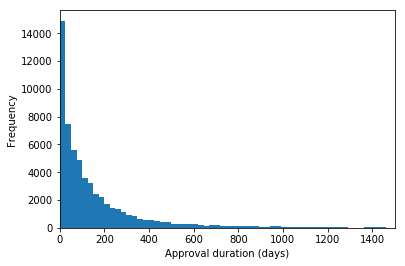

In [383]:
# Create a histogram of duration and include a statistical analysis.

normal_data['Duration'].plot(kind='hist', bins = 200)
plt.xlim(0,1500)
plt.xlabel('Approval duration (days)')
normal_data['Duration'].describe()

In [387]:
# create a histogram for Boroughs

boroughs = normal_data.groupby('Borough').count()

Text(0.5,0,'')

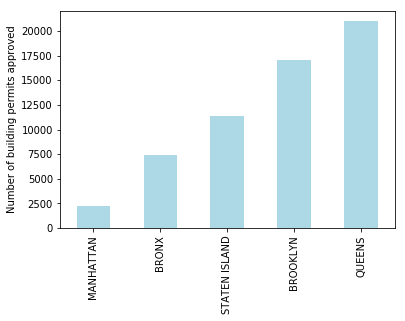

In [406]:
ax = boroughs['Approved'].sort_values().plot(kind='bar', color = 'lightblue')
ax.set_ylabel('Number of building permits approved')
ax.set_xlabel('')

count    59080.000000
mean       167.167011
std        259.639665
min          1.000000
25%         25.000000
50%         83.000000
75%        201.000000
max       4959.000000
Name: Duration, dtype: float64

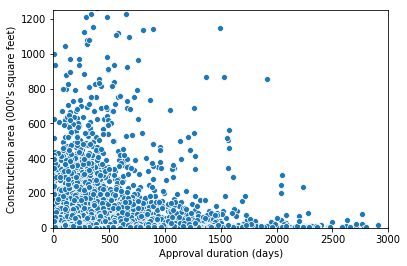

In [365]:
sns.scatterplot(normal_data
                ['Duration'].dt.days,
                newdata['TOTAL_CONSTRUCTION_FLOOR_AREA']/1000)
plt.xlabel('Approval duration (days)')
plt.ylabel("Construction area (000's square feet)")
plt.xlim(0,3000)
plt.ylim(0,1250)

normal_data['Duration'].dt.days.describe()

In [276]:
normal_data['TOTAL_CONSTRUCTION_FLOOR_AREA'].mean()

13556.563524035206

In [277]:
odd_data['TOTAL_CONSTRUCTION_FLOOR_AREA'].mean()

59804.045454545456

In [238]:
# Number of data points where Duration is 0
zero = data[data['Duration'].dt.days == 0].count()['Duration']
zero

11479

In [242]:
# Number of data points where Duration is Negative
negative = data[data['Duration'] < '0 days'].count()['Duration']
negative

44

In [256]:
# Number of data points where Duration is NaN 
nan_vals = data[data['Duration'].isna()].count()['Borough']
nan_vals

47858

In [260]:
zero + negative + nan_vals + normal

118461

In [259]:
normal = newdata.count()['Duration']
normal

59080

In [264]:
zero

11479

In [16]:
small = data.sample(frac = 0.01)

In [76]:
small['Time_to_approve'].describe()

count                         723
mean     153 days 20:14:56.265560
std      219 days 21:12:29.437037
min               0 days 00:00:00
25%              21 days 00:00:00
50%              77 days 00:00:00
75%             192 days 00:00:00
max            1964 days 00:00:00
Name: Time_to_approve, dtype: object